In [25]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [165]:
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
import numpy as np

from src.processing.characterise_biofilm import characterise_both_biofilm_images, characterise_biofilm_image
from src.processing.constants import BUCKLING_PATH, NEW_MOVIE_PATH
from src.processing.labelled_regions import label_regions, create_contours, characterise_regions
from src.processing.histogram_processing import nth_histogram_percentile

In [184]:
#bio_img = imread(str(NEW_MOVIE_PATH / "BB120_101020_LowDensity_Biolight_nobg_nooutliers_despeckle.tif"))
#bio_img = imread(str(NEW_MOVIE_PATH / "BB120_151220_GlassSlide_Biolight_nobg_nooutliers_despeckle.tif"))
bio_img = imread(str(NEW_MOVIE_PATH / "BB120_100621_LowDensity_Biolight_nobg_nooutliers_despeckle.tif"))

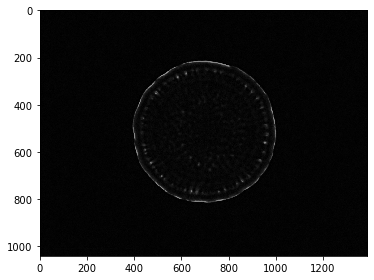

In [185]:
slice = 150
imshow(bio_img[slice])

/home/rads/miniconda3/envs/biofilm_env/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


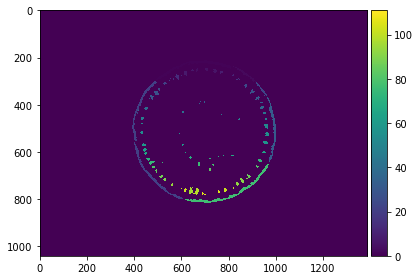

In [186]:
img_b = label_regions(bio_img[slice], 21)
imshow(img_b)

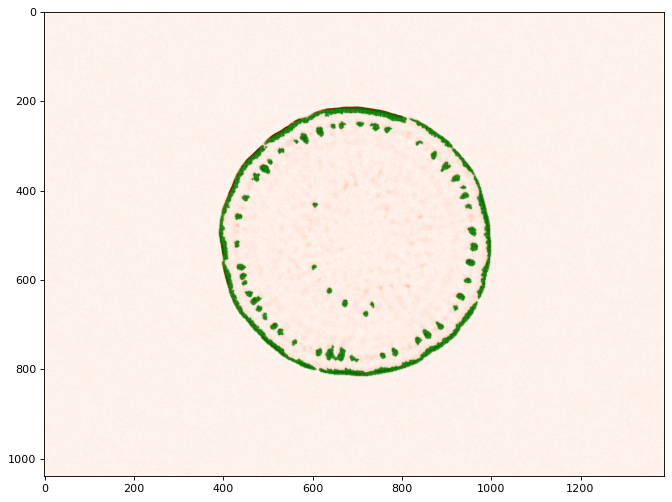

In [187]:
lit_area, average_area = characterise_regions(bio_img[slice], img_b, 50, plot = True)

In [188]:
plt.figure(figsize = (20,10))
weights, bins = np.histogram(bio_img[slice], 255, (0,255))
bins = bins[:-1]
#plt.plot(bins, weights)
cs_weights = np.cumsum(weights)
np.searchsorted(cs_weights, np.percentile(cs_weights, 90))
#cs_weights
#bin_idx = np.searchsorted(cs, np.percentile(cs, 75))
print(type(bins))

<class 'numpy.ndarray'>


<Figure size 1440x720 with 0 Axes>

In [205]:
slice = 115

In [208]:
threshold = nth_histogram_percentile(bio_img[slice], 95)
threshold

8

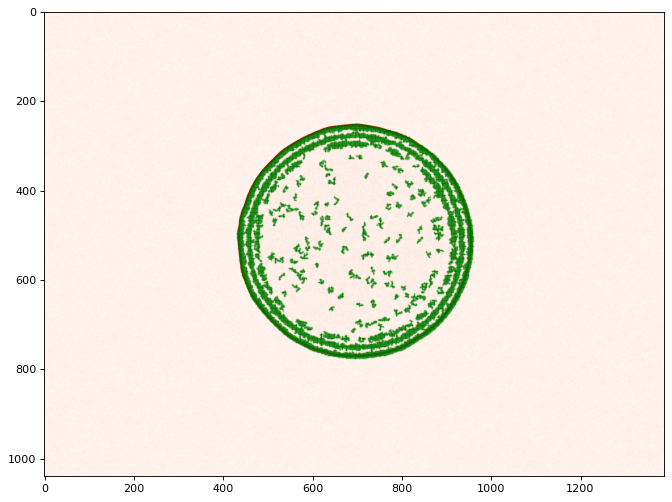

Bioluminescence image, slice 115/568
Timestamp: 1.91666666666667
Total lit area: 56051
Fraction of biofilm lit: 0.12167889021640492
Average area of lit region: 500.45535714285717
Biofilm radius: 382.920948710525



In [209]:
characterise_biofilm_image(bio_img, slice, type = 1, label_threshold = threshold)